In [1]:
import jsonpickle

In [2]:
learned_parameter_theta_file_name = 'learned_parameter_theta.json'

In [3]:
learned_parameter_theta_dict = jsonpickle.decode(open(learned_parameter_theta_file_name).read())

In [4]:
theta = learned_parameter_theta_dict['learned_parameter_theta']

In [5]:
import gym
import utils
import config as C
import numpy as np
import trading_vix

env = trading_vix.trading_vix()

In [6]:


#test the training result
observation = env.reset()
current_feature = utils.extract_features(observation,C.output_dim)

for t in range(200):

    #compute an action given current observation
    action = utils.compute_action_distribution(theta, current_feature, mode = 'test')

    #apply the action to the environment
    observation, reward, execute_sell  = env.step(action[0][0])

    #compute the next feature vector
    current_feature = utils.extract_features(observation, C.output_dim)

reward = env.final()
reward

108.49250639982581

In [7]:
visualize_time_length = 200

price_history = []
vix_history = []
action_history1 = np.zeros((1,visualize_time_length+1))
action_history2 = np.zeros((1,visualize_time_length+1))
portfolio_value_history = []
transaction_value_history = []

price,observation,portfolio_value,current_vix = env.reset(return_price=True)

price_history.append(price)
portfolio_value_history.append(portfolio_value)
transaction_value_history.append(0)
vix_history.append(current_vix)

current_feature = utils.extract_features(observation,C.output_dim)

for time_index in range(0,visualize_time_length):
    
    action = utils.compute_action_distribution(theta, current_feature, mode = 'test')
    
    
    #apply the action to the environment
    price, observation ,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value,\
    current_vix = env.step(action[0][0],return_price=True)
    
    #compute the next feature vector
    current_feature = utils.extract_features(observation, C.output_dim)

#     if execute_action and need_to_buy:
#         print('buy')
#         print('time index is',time_index)
#     if execute_action and need_to_sell:
#         print('sell')
#         print('time index is',time_index)
    
    #record price and action
    price_history.append(price)
    if execute_action:
        if need_to_buy:
            action_history1[0,time_index] = 2 #add 1 because of initial price observation
            #print('record buy action')
        if need_to_sell:
            action_history1[0,time_index] = 1
            #print('record sell action')

    if action < 0:
        action = 0.001
    if action > 1:
        action = 0.999
    
    action_history2[0,time_index] = action 
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(transaction_value)
    vix_history.append(current_vix)

In [8]:
print(action_history1.shape)
print(action_history2.shape)
print(len(price_history))
print(len(portfolio_value_history))
print(len(transaction_value_history))
print(len(vix_history))

(1, 201)
(1, 201)
201
201
201
201


In [9]:
import matplotlib.pyplot as plt

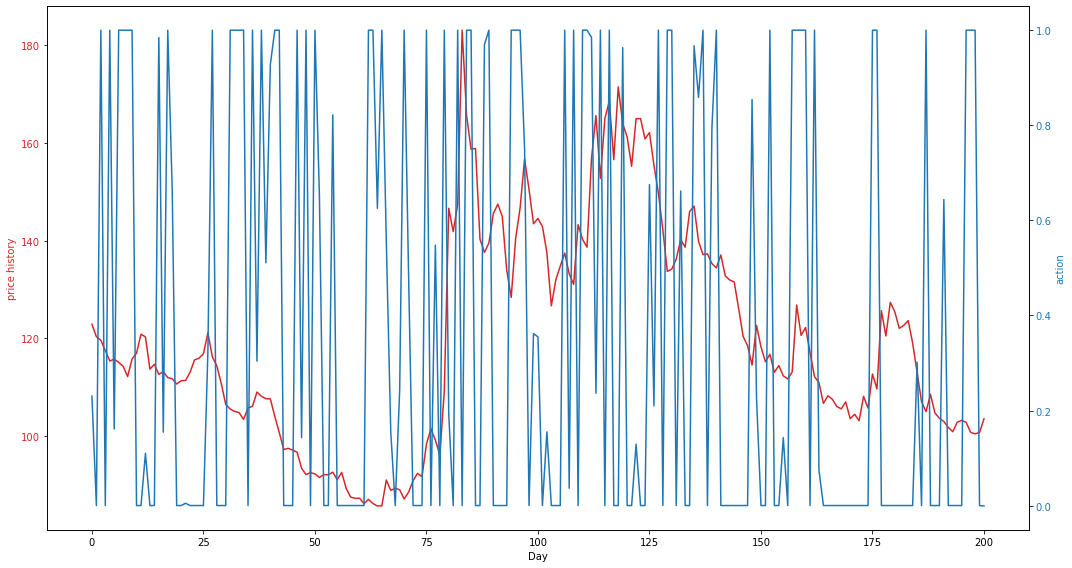

In [10]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

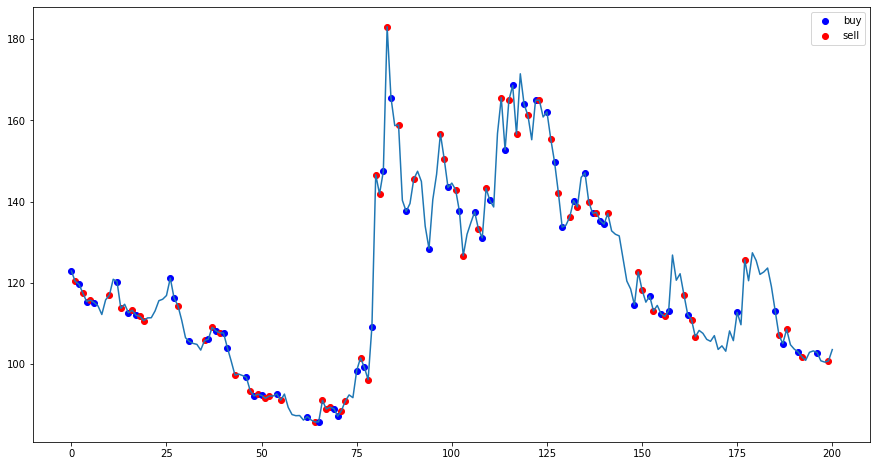

In [11]:


already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()



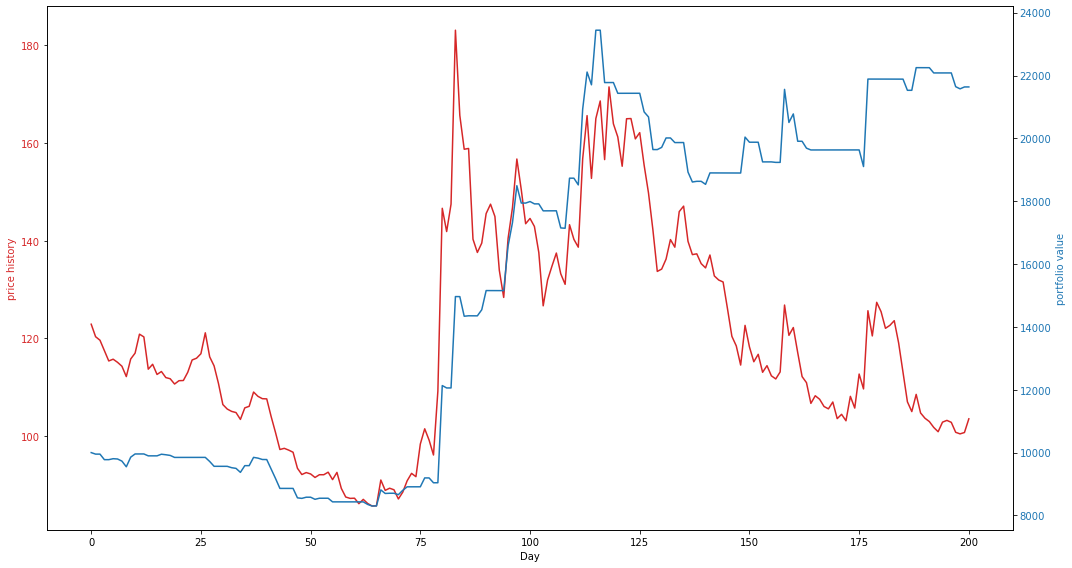

In [12]:


plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



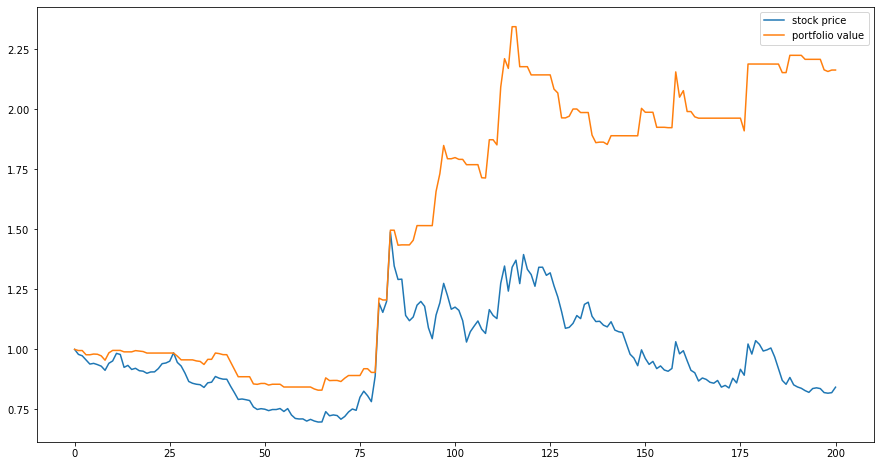

In [13]:
plt.plot(np.asarray(price_history)/price_history[0],label = 'stock price')
plt.plot(np.asarray(portfolio_value_history)/portfolio_value_history[0],label = 'portfolio value')
plt.legend()
plt.show()